<a href="https://colab.research.google.com/github/kcmath/Tf2-CNN/blob/master/CNN_CIFAR10_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
!pip install tensorflow-gpu

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 450kB 46.7MB/s 
     |████████████████████████████████| 3.8MB 60.9MB/s 
     |████████████████████████████████| 81kB 14.6MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goo

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0-rc1
/device:GPU:0
Num GPUs Available:  1


In [0]:
#imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

In [6]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 20s 396us/sample - loss: 1.2758 - accuracy: 0.5601 - val_loss: 0.9002 - val_accuracy: 0.6848
Epoch 2/15
50000/50000 [==============================] - 11s 226us/sample - loss: 0.8307 - accuracy: 0.7123 - val_loss: 0.7483 - val_accuracy: 0.7404
Epoch 3/15
50000/50000 [==============================] - 11s 223us/sample - loss: 0.6867 - accuracy: 0.7648 - val_loss: 0.6865 - val_accuracy: 0.7732
Epoch 4/15
50000/50000 [==============================] - 11s 223us/sample - loss: 0.5789 - accuracy: 0.8007 - val_loss: 0.7467 - val_accuracy: 0.7580
Epoch 5/15
50000/50000 [==============================] - 11s 226us/sample - loss: 0.4969 - accuracy: 0.8290 - val_loss: 0.7096 - val_accuracy: 0.7643
Epoch 6/15
50000/50000 [==============================] - 11s 228us/sample - loss: 0.4237 - accuracy: 0.8545 - val_loss: 0.5873 - val_accuracy: 0.8008
Epoch 7/15
50000/50000 [====================

In [7]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
history = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.6010 - accuracy: 0.8038 - val_loss: 0.6153 - val_accuracy: 0.7974
Epoch 2/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5066 - accuracy: 0.8303 - val_loss: 0.5600 - val_accuracy: 0.8144
Epoch 3/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4612 - accuracy: 0.8431 - val_loss: 0.5157 - val_accuracy: 0.8326
Epoch 4/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4349 - accuracy: 0.8516 - val_loss: 0.5112 - val_accuracy: 0.8304
Epoch 5/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.4129 - accuracy: 0.8599 - val_loss: 0.4966 - val_accuracy: 0.8355
Epoch 6/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3904 - accuracy: 0.8667 - val_loss: 0.487

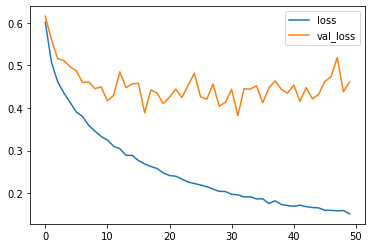

In [8]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

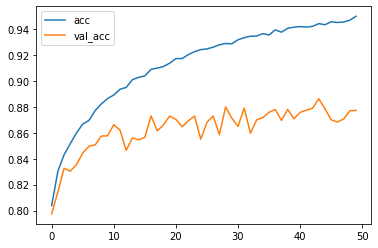

In [9]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[924   5  18  12   4   0   2   1  25   9]
 [  4 936   0   4   0   0   2   1  14  39]
 [ 42   0 815  41  27  24  35   8   3   5]
 [ 11   1  22 836  24  46  44   8   2   6]
 [ 14   0  27  41 863  14  29  10   2   0]
 [  8   2  18 179  27 731  18  11   5   1]
 [  5   2  17  36   8   1 927   1   1   2]
 [ 16   0   6  40  31  16   8 878   2   3]
 [ 27   6   7   9   1   0   0   0 939  11]
 [ 12  36   3   8   2   0   2   0  13 924]]


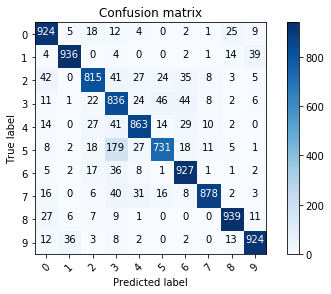

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

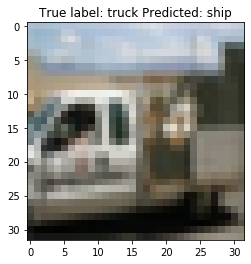

In [12]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));